In [1]:
# -*- coding: utf-8 -*-
%reset -f
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import pylab as pl
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [6]:
# without cate feat
algo = ['Lasso', 'Group L1', 'Binarsity', 'Group TV', 'GAM', 'RF', 'GB', 'SVM']
times_iono = [0.057, 0.459, 0.260, 0.408, 0.704, 0.944, 0.267, 0.032]
times_churn = [0.315, 0.395, 1.081, 2.590, 3.307, 1.244, 0.860, 1.035]
times_default_cb = [0.105, 0.662, 5.190, 9.564, 76.528, 25.896, 7.446, 204.137]
times_adult = [0.252, 1.385, 1.553, 4.437, 2.203, 8.562, 2.495, 1091.024]
times_bank = [0.089, 1.294, 6.005, 7.505, 28.976, 16.248, 12.465, 282.179]
times_covertype = [0.375, 3.766, 15.304, 16.075, 734.929, 404.063, 2793.913, np.nan]
times_susy = [0.943, 25.496, 25.329, 159.338, 142.543, 2493.527, 1453.607, np.nan]
times_hepmass = [1.252, 37.136, 62.926, 161.464, 440.517, 7058.866, 5049.604, np.nan]
times_higgs = [1.467, 55.537, 56.021, 299.414, 1390.870, 15588.849, 6430.913, np.nan]

times = pd.DataFrame(
    {'Algorithms': algo,
     'Ionosphere': times_iono,
     'Churn': times_churn,
     'Default of \n credit card': times_default_cb,
     'Adult': times_adult,
     'Bank \n marketing': times_bank,
     'Covertype': times_covertype,
     'SUSY': times_susy,
     'HEPMASS': times_hepmass,
     'HIGGS': times_higgs
    })

# order columns
columns = ['Algorithms', 'Ionosphere', 'Churn', 'Default of \n credit card',
          'Adult', 'Bank \n marketing', 'Covertype', 'SUSY', 'HEPMASS', 'HIGGS']
times = times[columns]

times

,Algorithms,Ionosphere,Churn,Default of credit card,Adult,Bank marketing,Covertype,SUSY,HEPMASS,HIGGS
0,Lasso,0.057,0.315,0.105,0.252,0.089,0.375,0.943,1.252,1.467
1,Group L1,0.459,0.395,0.662,1.385,1.294,3.766,25.496,37.136,55.537
2,Binarsity,0.260,1.081,5.190,1.553,6.005,15.304,25.329,62.926,56.021
3,Group TV,0.408,2.590,9.564,4.437,7.505,16.075,159.338,161.464,299.414
4,GAM,0.704,3.307,76.528,2.203,28.976,734.929,142.543,440.517,1390.870
5,RF,0.944,1.244,25.896,8.562,16.248,404.063,2493.527,7058.866,15588.849
6,GB,0.267,0.860,7.446,2.495,12.465,2793.913,1453.607,5049.604,6430.913
7,SVM,0.032,1.035,204.137,1091.024,282.179,NaN,NaN,NaN,NaN


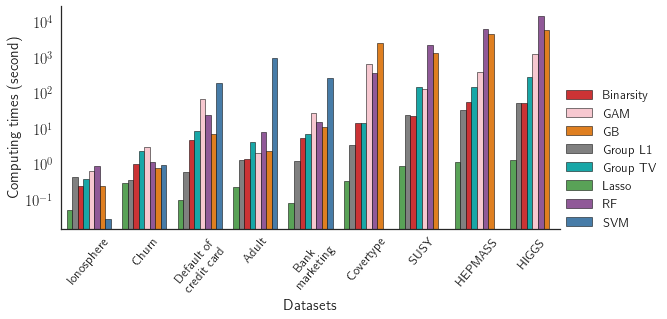

In [7]:
data = times.set_index('Algorithms').unstack().reset_index()
data.columns = ['Datasets','Algorithms', 'Computing times (second)']

colors = pl.cm.Set1(np.linspace(0, .5, 5))
palette = {
    'Lasso': colors[2],
    'Group TV': 'c',
    'Binarsity': colors[0],
    'Group L1': 'grey',
    'RF': colors[3],
    'GB': colors[4],
    'SVM': colors[1],
    'GAM': 'pink'
}

fig = pl.figure(figsize=(15, 7))
sns.set(style="white")

sns.set_context(rc = {'patch.linewidth': 1.0})

g = sns.factorplot(x='Datasets',
                   y= 'Computing times (second)',
                   hue='Algorithms',
                   data=data,
                   kind='bar',
                   aspect=2,
                   palette=palette,
                   legend=False,
                   edgecolor='black',
                   linewidth=.5)
g.set_ylabels(fontsize = 15)
g.set_xlabels(fontsize = 15)
g.set_xticklabels(rotation=50, fontsize = 13)
g.add_legend(fontsize = 13)
g.set_yticklabels(fontsize = 15)
g.fig.get_axes()[0].set_yscale('log')
pl.savefig('./times.pdf', bbox_inches='tight')
pl.show()